# Lab: Trees and Model Stability

Trees are notorious for being **unstable**: Small changes in the data can lead to noticeable or large changes in the tree. We're going to explore this phenomenon, and a common rebuttal.

In the folder for this lab, there are three datasets that we used in class: Divorce, heart failure, and the AirBnB price dataset.

1. Pick one of the datasets and appropriately clean it.
2. Perform a train-test split for a specific seed (save the seed for reproducibility). Fit a classification/regression tree and a linear model on the training data and evaluate their performance on the test data. Set aside the predictions these models make.
3. Repeat step 2 for three to five different seeds (save the seeds for reproducibility). How different are the trees that you get? Your linear model coefficients?. Set aside the predictions these models make.

Typically, you would see the trees changing what appears to be a non-trivial amount, while the linear model coefficients don't vary nearly as much. Often, the changes appear substantial.

But are they?

4. Instead of focusing on the tree or model coefficients, do three things:
    1. Make scatterplots of the predicted values on the test set from question 2 against the predicted values for the alternative models from part 3, separately for your trees and linear models. Do they appear reasonably similar?
    2. Compute the correlation between your model in part 2 and your alternative models in part 3, separately for your trees and linear models. Are they highly correlated or not?
    3. Run a simple linear regression of the predicted values on the test set from the alternative models on the predicted values from question 2, separately for your trees and linear models. Is the intercept close to zero? Is the slope close to 1? Is the $R^2$ close to 1?

5. Do linear models appear to have similar coefficients and predictions across train/test splits? Do trees?
6. True or false, and explain: "Even if the models end up having a substantially different appearance, the predictions they generate are often very similar."

In [1]:
#part 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

heart = pd.read_csv('data/heart_failure/heart_failure_clinical_records_dataset.csv')

print("First 5 rows of the DataFrame:")
print(heart.head())

print("\nDataFrame Information:")
heart.info()

print("\nMissing values per column:")
print(heart.isnull().sum())
#No missing values and no objects in the dataset

First 5 rows of the DataFrame:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        

In [2]:
X = heart.drop('DEATH_EVENT', axis=1)
y =heart['DEATH_EVENT']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFirst 5 rows of features (X):")
print(X.head())
print("\nFirst 5 values of target (y):")
print(y.head())

Features (X) shape: (299, 12)
Target (y) shape: (299,)

First 5 rows of features (X):
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  

In [3]:
#train-test split

from sklearn.model_selection import train_test_split

random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (239, 12)
y_train shape: (239,)
X_test shape: (60, 12)
y_test shape: (60,)


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Initialize and train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=random_seed)
dt_model.fit(X_train, y_train)

# Make predictions with Decision Tree
dt_predictions = dt_model.predict(X_test)

# Initialize and train Logistic Regression model
lr_model = LogisticRegression(random_state=random_seed, solver='liblinear') # 'liblinear' solver for small datasets
lr_model.fit(X_train, y_train)

# Make predictions with Logistic Regression
lr_predictions = lr_model.predict(X_test)

print("Decision Tree predictions (first 5):")
print(dt_predictions[:5])
print("\nLogistic Regression predictions (first 5):")
print(lr_predictions[:5])

Decision Tree predictions (first 5):
[1 0 0 1 0]

Logistic Regression predictions (first 5):
[0 0 0 1 0]


In [5]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate Decision Tree Classifier
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))

# Evaluate Logistic Regression Model
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"\nLogistic Regression Accuracy: {lr_accuracy:.4f}")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))

Decision Tree Accuracy: 0.6333

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71        35
           1       0.58      0.44      0.50        25

    accuracy                           0.63        60
   macro avg       0.62      0.61      0.61        60
weighted avg       0.63      0.63      0.62        60


Logistic Regression Accuracy: 0.7500

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



In [6]:
#pt 3

random_seeds = [10, 20, 30, 40, 50]

dt_predictions_per_seed = []
dt_structures_per_seed = []
lr_predictions_per_seed = []
lr_coefficients_per_seed = []

print(f"Random seeds defined: {random_seeds}")
print("Empty lists initialized for storing model results per seed.")

Random seeds defined: [10, 20, 30, 40, 50]
Empty lists initialized for storing model results per seed.


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

for seed in random_seeds:
    print(f"\nProcessing with random seed: {seed}")

    # 1. Train-test split
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.2, random_state=seed)

    # 2. Train Decision Tree Classifier
    dt_model_s = DecisionTreeClassifier(random_state=seed)
    dt_model_s.fit(X_train_s, y_train_s)
    dt_predictions_s = dt_model_s.predict(X_test_s)
    dt_predictions_per_seed.append(dt_predictions_s)

    # Store Decision Tree structure
    dt_structures_per_seed.append({
        'node_count': dt_model_s.tree_.node_count,
        'max_depth': dt_model_s.tree_.max_depth
    })
    print(f"Decision Tree: nodes={dt_model_s.tree_.node_count}, max_depth={dt_model_s.tree_.max_depth}")

    # 3. Train Logistic Regression model
    lr_model_s = LogisticRegression(random_state=seed, solver='liblinear', max_iter=1000)
    lr_model_s.fit(X_train_s, y_train_s)
    lr_predictions_s = lr_model_s.predict(X_test_s)
    lr_predictions_per_seed.append(lr_predictions_s)

    # Store Logistic Regression coefficients
    lr_coefficients_per_seed.append({
        'coefficients': lr_model_s.coef_,
        'intercept': lr_model_s.intercept_
    })

print("\nModel training and prediction storage complete for all seeds.")



Processing with random seed: 10
Decision Tree: nodes=63, max_depth=8

Processing with random seed: 20
Decision Tree: nodes=69, max_depth=9

Processing with random seed: 30
Decision Tree: nodes=69, max_depth=9

Processing with random seed: 40
Decision Tree: nodes=69, max_depth=8

Processing with random seed: 50
Decision Tree: nodes=61, max_depth=9

Model training and prediction storage complete for all seeds.


In [8]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

print("--- Model Accuracies per Seed ---")
for i, seed in enumerate(random_seeds):
    # train-test split
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.2, random_state=seed)

    # Get predictions for the current seed
    dt_preds = dt_predictions_per_seed[i]
    lr_preds = lr_predictions_per_seed[i]

    # Calculate accuracies
    dt_acc = accuracy_score(y_test_s, dt_preds)
    lr_acc = accuracy_score(y_test_s, lr_preds)

    print(f"\nSeed {seed}:")
    print(f"  Decision Tree Accuracy: {dt_acc:.4f}")
    print(classification_report(y_test, dt_preds))

    print(f"  Logistic Regression Accuracy: {lr_acc:.4f}")
    print(classification_report(y_test, lr_preds))



--- Model Accuracies per Seed ---

Seed 10:
  Decision Tree Accuracy: 0.7667
              precision    recall  f1-score   support

           0       0.54      0.63      0.58        35
           1       0.32      0.24      0.27        25

    accuracy                           0.47        60
   macro avg       0.43      0.43      0.43        60
weighted avg       0.44      0.47      0.45        60

  Logistic Regression Accuracy: 0.8000
              precision    recall  f1-score   support

           0       0.63      0.77      0.69        35
           1       0.53      0.36      0.43        25

    accuracy                           0.60        60
   macro avg       0.58      0.57      0.56        60
weighted avg       0.59      0.60      0.58        60


Seed 20:
  Decision Tree Accuracy: 0.7167
              precision    recall  f1-score   support

           0       0.63      0.69      0.66        35
           1       0.50      0.44      0.47        25

    accuracy           

Part 4

In [9]:
dt_probs_seed42 = dt_model.predict_proba(X_test)[:, 1]
lr_probs_seed42 = lr_model.predict_proba(X_test)[:, 1]

dt_probs_same_test = []
lr_probs_same_test = []

for seed in random_seeds:
    X_train_s, _, y_train_s, _ = train_test_split(X, y, test_size=0.2, random_state=seed)

    dt_model_s = DecisionTreeClassifier(random_state=seed)
    dt_model_s.fit(X_train_s, y_train_s)
    dt_probs_same_test.append(dt_model_s.predict_proba(X_test)[:, 1])

    lr_model_s = LogisticRegression(random_state=seed, solver='liblinear', max_iter=1000)
    lr_model_s.fit(X_train_s, y_train_s)
    lr_probs_same_test.append(lr_model_s.predict_proba(X_test)[:, 1])

4.1 Scatterplots

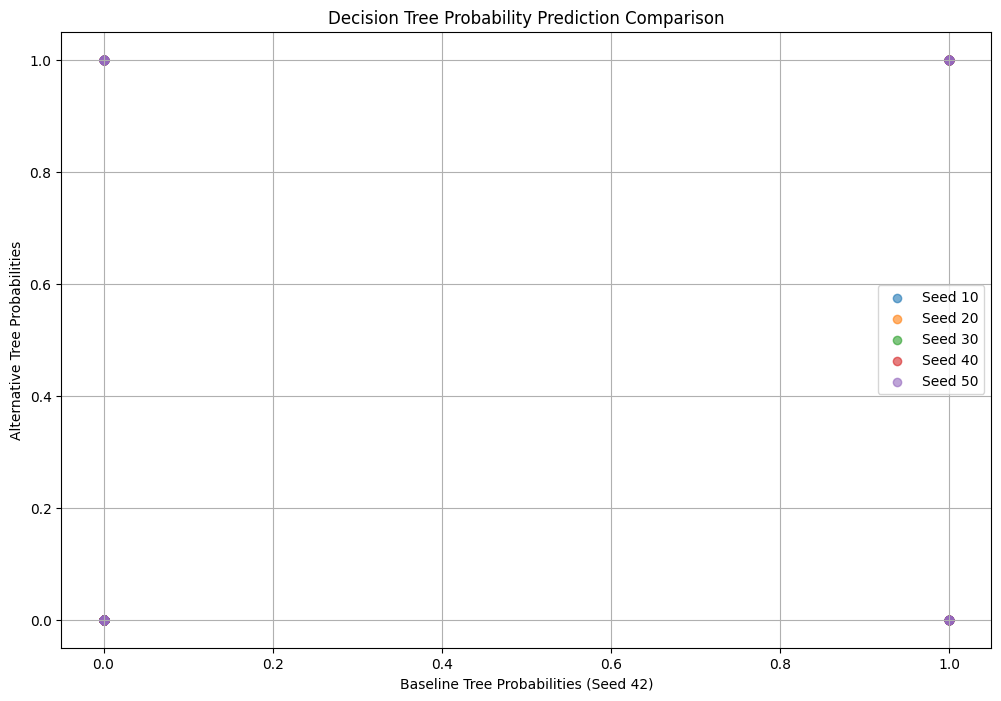

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i, seed in enumerate(random_seeds):
    plt.scatter(dt_probs_seed42, dt_probs_same_test[i], alpha=0.6, label=f"Seed {seed}")

plt.xlabel("Baseline Tree Probabilities (Seed 42)")
plt.ylabel("Alternative Tree Probabilities")
plt.title("Decision Tree Probability Prediction Comparison")
plt.legend()
plt.grid(True)
plt.show()

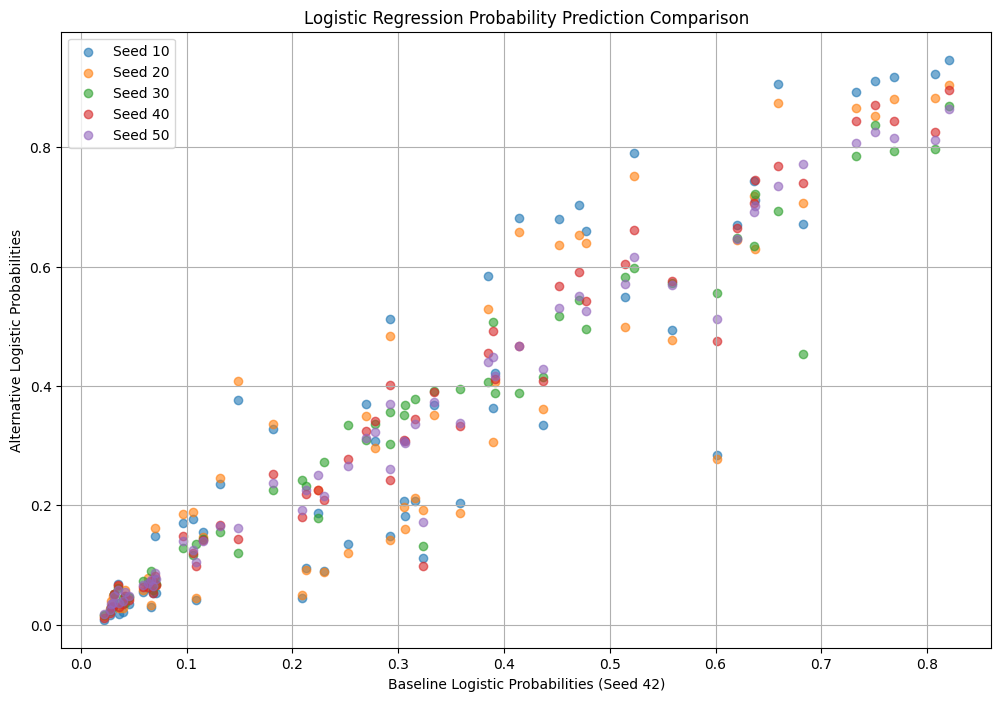

In [16]:
plt.figure(figsize=(12, 8))
for i, seed in enumerate(random_seeds):
    plt.scatter(lr_probs_seed42, lr_probs_same_test[i], alpha=0.6, label=f"Seed {seed}")

plt.xlabel("Baseline Logistic Probabilities (Seed 42)")
plt.ylabel("Alternative Logistic Probabilities")
plt.title("Logistic Regression Probability Prediction Comparison")
plt.legend()
plt.grid(True)
plt.show()

The decision tree scatterplots do not appear similar across seeds as they collapse into just a few possible probability values (0 or 1), creating four corner points rather than a continuous cloud. This reflects that trees place test points into different terminal leaves depending on the split, dramatically altering the predicted probabilities. The logistic regression scatterplot shows a clear linear relationship, with points along a diagonal band. This indicates that logistic regression produces very consistent predictions even when the train test split changes.

4.2 Correlations

In [18]:
print("Decision Tree Probability Correlations:")
for i, seed in enumerate(random_seeds):
    corr = np.corrcoef(dt_probs_seed42, dt_probs_same_test[i])[0, 1]
    print(f"  Seed {seed}: correlation = {corr:.4f}")

print("\nLogistic Regression Probability Correlations:")
for i, seed in enumerate(random_seeds):
    corr = np.corrcoef(lr_probs_seed42, lr_probs_same_test[i])[0, 1]
    print(f"  Seed {seed}: correlation = {corr:.4f}")

Decision Tree Probability Correlations:
  Seed 10: correlation = 0.3476
  Seed 20: correlation = 0.1755
  Seed 30: correlation = 0.4169
  Seed 40: correlation = 0.3694
  Seed 50: correlation = 0.1514

Logistic Regression Probability Correlations:
  Seed 10: correlation = 0.9149
  Seed 20: correlation = 0.9139
  Seed 30: correlation = 0.9761
  Seed 40: correlation = 0.9792
  Seed 50: correlation = 0.9890


The tree predictions have very low correlations (0.15–0.42), showing that their predicted probabilities vary substantially across different seeds. Logistic regression predictions are highly correlated (0.91–0.99), demonstrating strong stability across splits.

4.3 Regression on Alt models

In [19]:
import statsmodels.api as sm

def run_regression(base_preds, alt_preds):
    X = sm.add_constant(base_preds) 
    model = sm.OLS(alt_preds, X).fit()
    intercept, slope = model.params
    r2 = model.rsquared
    return intercept, slope, r2

print("Decision Tree Probability Regressions:")
for i, seed in enumerate(random_seeds):
    intercept, slope, r2 = run_regression(dt_probs_seed42, dt_probs_same_test[i])
    print(f"\nSeed {seed}:")
    print(f"  Intercept: {intercept:.4f}")
    print(f"  Slope:     {slope:.4f}")
    print(f"  R^2:       {r2:.4f}")

print("\nLogistic Regression Probability Regressions:")
for i, seed in enumerate(random_seeds):
    intercept, slope, r2 = run_regression(lr_probs_seed42, lr_probs_same_test[i])
    print(f"\nSeed {seed}:")
    print(f"  Intercept: {intercept:.4f}")
    print(f"  Slope:     {slope:.4f}")
    print(f"  R^2:       {r2:.4f}")

Decision Tree Probability Regressions:

Seed 10:
  Intercept: 0.2683
  Slope:     0.3633
  R^2:       0.1208

Seed 20:
  Intercept: 0.3415
  Slope:     0.1849
  R^2:       0.0308

Seed 30:
  Intercept: 0.2927
  Slope:     0.4442
  R^2:       0.1738

Seed 40:
  Intercept: 0.2927
  Slope:     0.3915
  R^2:       0.1365

Seed 50:
  Intercept: 0.3659
  Slope:     0.1605
  R^2:       0.0229

Logistic Regression Probability Regressions:

Seed 10:
  Intercept: -0.0182
  Slope:     1.1488
  R^2:       0.8371

Seed 20:
  Intercept: -0.0049
  Slope:     1.0791
  R^2:       0.8352

Seed 30:
  Intercept: 0.0135
  Slope:     1.0133
  R^2:       0.9527

Seed 40:
  Intercept: -0.0044
  Slope:     1.1021
  R^2:       0.9588

Seed 50:
  Intercept: 0.0035
  Slope:     1.0611
  R^2:       0.9782


For trees, the intercepts are far from 0, slopes are far from 1, and R² values are very low, confirming that tree predictions differ heavily across seeds. For logistic regression, intercepts are near 0, slopes close to 1, and R² values high (0.84–0.98), indicating predictions from different seeds closely match the baseline model.

5.  Do linear models appear to have similar coefficients and predictions across train/test splits? Do trees?

Yes. The linear models (log reg) had coefficients that changed only slightly across seeds, and their predictions were extremely consistent. The scatterplots formed tight diagonals, the correlations were mostly above 0.8–0.95, and the regression slopes were close to 1 with r^2 values near 1. This shows that linear models are stable with different train test splits leading to nearly identical predictions.

The decision trees however were not stable. Their structures varied substantially with different node counts and depths, and their predictions were not consistent across seeds. Correlations were low (0.15–0.40) and the regressions showed slopes far from 1 and very low r^2. This shows that trees are unstable models with predictions that can vary noticeably across splits.

6. True or false, and explain: "Even if the models end up having a substantially different appearance, the predictions they generate are often very similar."

True for linear models, but not for the decision trees in this dataset.

The results show that even when logistic regression coefficients changed slightly, the predictions remained very similar across splits. This matches the idea that stable models can look different but still behave similarly.

However, the decision trees did not show this property as their structures changed a lot and their predictions differed substantially across random seeds. So the statement is true in general for stable models like linear models, but not true for decision trees in this lab where the instability carried over into the predictions.